In [5]:
from IPython.display import display
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import pandas as pd
import matplotlib.pyplot as plt

# importing time so the start and end time can be used to calculate file loading time
print("Loading data file now, this could take a while depending on file size")
start = time.time()
# df is 'DataFrame' - make sure you downloaded the file to the data folder
df = pd.read_csv('hotel.csv')
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
print("\n")

print("The shape of the data (rows, cols) is " + str(df.shape))
print("\n")

# value_counts() creates a Series object that has index and values in this case, the country and the frequency they occur in reviewer nationality
nationality_freq = df["Reviewer_Nationality"].value_counts()
print("There are " + str(nationality_freq.size) + " different nationalities")
print("\n")
# print first and last rows of the Series. Change to nationality_freq.to_string() to print all of the data
print(nationality_freq) 
print("\n")

print("The highest frequency reviewer nationality is " + str(nationality_freq.index[0]).strip() + " with " + str(nationality_freq[0]) + " reviews.")
# Notice there is a leading space on the values, strip() removes that for printing
# What is the top 10 most common nationalities and their frequencies?
print("The next 10 highest frequency reviewer nationalities are:")
print(nationality_freq[1:11].to_string())
print("\n")

# What was the most frequently reviewed hotel for the top 10 nationalities
# Normally with pandas you will avoid an explicit loop, but wanted to show creating a new dataframe using criteria (don't do this with large amounts of data because it could be very slow)
for nat in nationality_freq[:10].index:
   # First, extract all the rows that match the criteria into a new dataframe
   nat_df = df[df["Reviewer_Nationality"] == nat]   
   # Now get the hotel freq
   freq = nat_df["Hotel_Name"].value_counts()
   print("The most reviewed hotel for " + str(nat).strip() + " was " + str(freq.index[0]) + " with " + str(freq[0]) + " reviews.") 

   print("\n")

# First create a new dataframe based on the old one, removing the uneeded columns
hotel_freq_df = df.drop(["Hotel_Address", "Additional_Number_of_Scoring", "Review_Date", "Average_Score", "Reviewer_Nationality", "Negative_Review", "Review_Total_Negative_Word_Counts", "Positive_Review", "Review_Total_Positive_Word_Counts", "Total_Number_of_Reviews_Reviewer_Has_Given", "Reviewer_Score", "Tags", "days_since_review", "lat", "lng"], axis = 1)

# Group the rows by Hotel_Name, count them and put the result in a new column Total_Reviews_Found
hotel_freq_df['Total_Reviews_Found'] = hotel_freq_df.groupby('Hotel_Name').transform('count')

# Get rid of all the duplicated rows
hotel_freq_df = hotel_freq_df.drop_duplicates(subset = ["Hotel_Name"])
display(hotel_freq_df) 

print("\n")
# define a function that takes a row and performs some calculation with it
def get_difference_review_avg(row):
  return row["Average_Score"] - row["Calc_Average_Score"]

# 'mean' is mathematical word for 'average'
df['Calc_Average_Score'] = round(df.groupby('Hotel_Name').Reviewer_Score.transform('mean'), 1)

# Add a new column with the difference between the two average scores
df["Average_Score_Difference"] = df.apply(get_difference_review_avg, axis = 1)

# Create a df without all the duplicates of Hotel_Name (so only 1 row per hotel)
review_scores_df = df.drop_duplicates(subset = ["Hotel_Name"])

# Sort the dataframe to find the lowest and highest average score difference
review_scores_df = review_scores_df.sort_values(by=["Average_Score_Difference"])

print(review_scores_df[[ "Hotel_Name","Calc_Average_Score" ]])
print("\n")

Loading data file now, this could take a while depending on file size
Loading took 3.25 seconds


The shape of the data (rows, cols) is (515738, 17)


There are 227 different nationalities


 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64


The highest frequency reviewer nationality is United Kingdom with 245246 reviews.
The next 10 highest frequency reviewer nationalities are:
 United States of America     35437
 Australia                    21686
 Ireland                      14827
 United Arab Emirates         10235
 Saudi Arabia                  8951
 Netherlands              

,Hotel_Name,Total_Number_of_Reviews,Total_Reviews_Found
0,Hotel Arena,1403,405
405,K K Hotel George,1831,566
971,Apex Temple Court Hotel,2619,1037
2008,The Park Grand London Paddington,4380,1770
3778,Monhotel Lounge SPA,171,35
...,...,...,...
511962,Suite Hotel 900 m zur Oper,3461,439
512401,Hotel Amadeus,717,144
512545,The Berkeley,232,100
512645,Holiday Inn London Kensington,5945,2768




                                               Hotel_Name  Calc_Average_Score
495945                         Best Western Hotel Astoria                 8.5
111027  Hotel Stendhal Place Vend me Paris MGallery by...                 9.5
43688                       Mercure Paris Porte d Orleans                 8.2
178253                    Renaissance Paris Vendome Hotel                 8.6
218258                                Hotel Royal Elys es                 7.5
...                                                   ...                 ...
151416                        Best Western Allegro Nation                 7.1
22189              Holiday Inn Paris Montparnasse Pasteur                 6.3
250308          MARQUIS Faubourg St Honor Relais Ch teaux                 7.7
68936                                       Villa Eugenie                 5.9
3813                                   Kube Hotel Ice Bar                 5.9

[1492 rows x 2 columns]




In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("hotel1.csv")
print(data.head())

                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


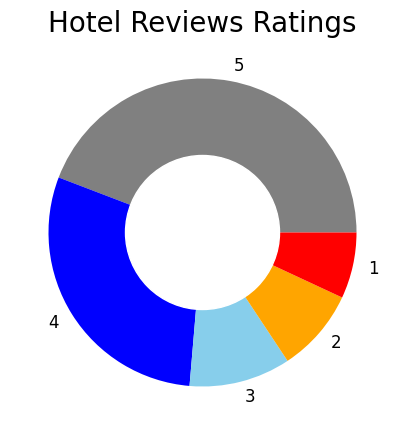

In [7]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["grey", "blue", 'skyblue', "orange", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [8]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)
    
data["review_clean"] = data["Review"].apply(lambda x: clean_text(x))
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
print(data.head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Review  Rating  \
0  nice hotel expensive parking got good deal sta...       4   
1  ok nothing special charge diamond member hilto...       2   
2  nice rooms not 4* experience hotel monaco seat...       3   
3  unique, great stay, wonderful time hotel monac...       5   
4  great stay great stay, went seahawk game aweso...       5   

                                        review_clean  Positive  Negative  \
0  nice hotel expensive parking get good deal sta...     0.285     0.072   
1  ok nothing special charge diamond member hilto...     0.189     0.110   
2  nice room experience hotel monaco seattle good...     0.219     0.081   
3  unique great stay wonderful time hotel monaco ...     0.385     0.060   
4  great stay great stay go seahawk game awesome ...     0.221     0.135   

   Neutral  
0    0.643  
1    0.701  
2    0.700  
3    0.555  
4    0.643  


In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
n = sum(data["Rating"])/len(data.axes[0])
k =x+y+z
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
print("Positive: ", x/k*100,"%")
print("Negative: ", y/k*100,"%")
print("Neutral: ", z/k*100,"%")
print("Average Rating:",n)

Positive:  31.037557782038554 %
Negative:  7.190835318878605 %
Neutral:  61.77160689908283 %
Average Rating: 3.952222927138744


In [11]:
l = (x*5 + y*1 + z*3)/k
print(l)
print("Accuracy: ",l*100/n,"%")

3.4769344492631986
Accuracy:  87.97414805192591 %
